In [ ]:
# import spacec first
import spacec as sp

# silencing warnings
import warnings
warnings.filterwarnings('ignore')

#import standard packages
import os
import scanpy as sc
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sc.settings.set_figure_params(dpi=80, facecolor='white')

root_path = "/Users/arcz/Desktop/research/allo immunity/OLT-alloimmunity/" 
data_path = '/Users/arcz/Desktop/research/allo immunity/example_data/raw/'
output_dir = "/Users/arcz/Desktop/research/allo immunity/OLT-alloimmunity/space/saves/"
os.makedirs(output_dir, exist_ok=True)

/opt/anaconda3/envs/spacec/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


#### Recreate ann data
03.1 preprocessing

df_nn has all the markers, where do they go when put in the an data?

There is some cut offs for filtering here with magic numbers, is this something we should do?



In [25]:
markers = [ 
    'START-MARKER','END-MARKER', 'DAPI', 'x', 'y', 'area', 'region_num',
    'unique_region', 'condition'
]

print(len(markers))
#recreating random data using modified markers, no GATA-3 instead END-MARKER
np.random.seed(42)
n_rows = 10
df_example = pd.DataFrame({marker: np.random.rand(n_rows) for marker in markers})
df_example['x'] = np.random.randint(0, 512, size=n_rows)
df_example['y'] = np.random.randint(0, 512, size=n_rows)
df_example['area'] = np.random.randint(50, 500, size=n_rows)
df_example['region_num'] = np.random.randint(1, 5, size=n_rows)
df_example['unique_region'] = [i for i in range(n_rows)]
df_example['condition'] = np.random.choice(['control', 'treated'], size=n_rows)
#print(df_example)


last_marker = df_example.columns.get_loc('END-MARKER')
#print(last_marker)

adata_example = sp.hf.make_anndata(
    df_nn = df_example,
    col_sum = last_marker,
    nonFuncAb_list = []
)

print(adata_example)


9
AnnData object with n_obs × n_vars = 10 × 2
    obs: 'DAPI', 'x', 'y', 'area', 'region_num', 'unique_region', 'condition'


#### Test end stage analysis on new ann data

04_clustering

In [26]:
clustering_random_seed = 0

marker_list = [
    'START-MARKER','END-MARKER'
]

adata_example = sp.tl.clustering(
    adata_example,
    clustering='leiden', # can choose between leiden and louvian
    n_neighbors=10, # number of neighbors for the knn graph
    resolution = 1, #clustering resolution (higher resolution gives more clusters)
    reclustering = False, # if true, no computing the neighbors
    marker_list = marker_list, #if it is None, all variable names are used for clustering
    seed=clustering_random_seed, # random seed for clustering - reproducibility
)

print(adata_example)

Computing neighbors and UMAP
- neighbors
- UMAP
Clustering
Leiden clustering
AnnData object with n_obs × n_vars = 10 × 2
    obs: 'DAPI', 'x', 'y', 'area', 'region_num', 'unique_region', 'condition', 'leiden_1'
    uns: 'neighbors', 'umap', 'leiden_1'
    obsm: 'X_umap'
    obsp: 'distances', 'connectivities'


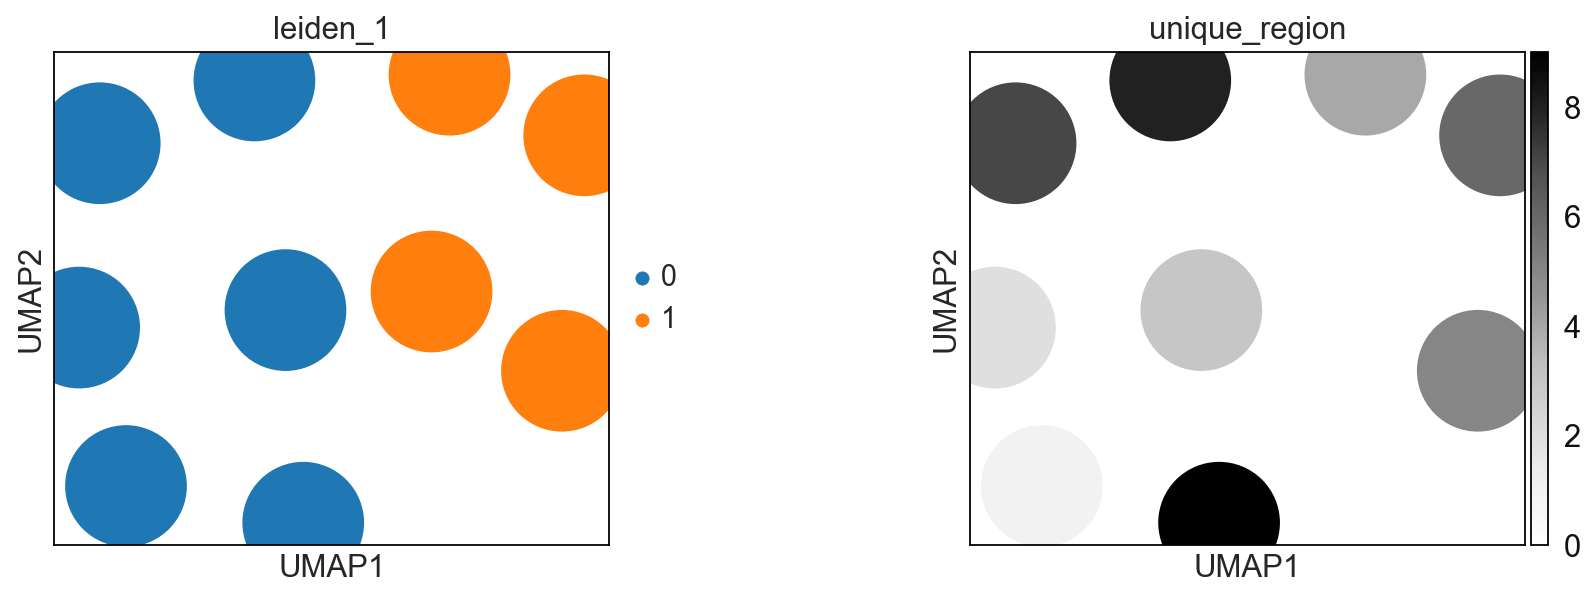

In [27]:
sc.pl.umap(adata_example, color = ['leiden_1', 'unique_region'], wspace=0.5) 

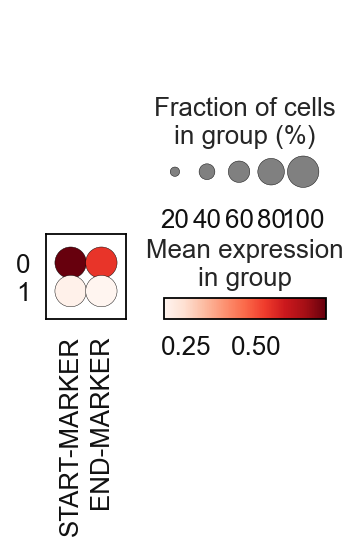

In [28]:
sc.pl.dotplot(adata_example, 
              marker_list, # The list of markers to show on the x-axis
              'leiden_1', # The cluster column
              dendrogram = True) # Show the dendrogram

#### subclustering
this appears unavoidable, required to modify a data for later use?
